In [1]:
import os
os.chdir("C:/Users/Ezinne/Desktop/AMIS")
os.getcwd()

'C:\\Users\\Ezinne\\Desktop\\AMIS'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
sns.set(color_codes = True)

In [3]:
amis = pd.read_csv('amis.csv') ##Read the amis data
amis.shape

(8437, 5)

In [4]:
amis.head(3)

,Unnamed: 0,speed,period,warning,pair
0,1,26,1,1,1
1,2,26,1,1,1
2,3,26,1,1,1


In [5]:
amis.describe()

,Unnamed: 0,speed,period,warning,pair
count,8437.000000,8437.000000,8437.000000,8437.000000,8437.000000
mean,4219.000000,37.824227,2.004385,1.506697,7.558848
std,2435.696444,6.507540,0.817428,0.499985,4.030791
min,1.000000,19.000000,1.000000,1.000000,1.000000
25%,2110.000000,33.000000,1.000000,1.000000,4.000000
50%,4219.000000,37.000000,2.000000,2.000000,8.000000
75%,6328.000000,42.000000,3.000000,2.000000,11.000000
max,8437.000000,67.000000,3.000000,2.000000,14.000000


In [6]:
amis.info

<bound method DataFrame.info of       Unnamed: 0  speed  period  warning  pair
0              1     26       1        1     1
1              2     26       1        1     1
2              3     26       1        1     1
3              4     26       1        1     1
4              5     27       1        1     1
...          ...    ...     ...      ...   ...
8432        8433     42       3        2    14
8433        8434     46       3        2    14
8434        8435     47       3        2    14
8435        8436     48       3        2    14
8436        8437     47       3        2    14

[8437 rows x 5 columns]>

In [7]:
### Convert the period, warning, and pair columns to categorical, R's equivalent of a factor
amis['period'] = amis['period'].astype('category')
amis['warning'] = amis['warning'].astype('category')
amis['pair'] = amis['pair'].astype('category')

In [8]:
amis.dtypes

Unnamed: 0       int64
speed            int64
period        category
warning       category
pair          category
dtype: object

In [9]:
##Drop Irrelevant columns
amis = amis.drop(['Unnamed: 0'], axis = 1)

amis.head(3)

,speed,period,warning,pair
0,26,1,1,1
1,26,1,1,1
2,26,1,1,1


In [10]:
amis.count()

speed      8437
period     8437
warning    8437
pair       8437
dtype: int64

In [11]:
#Check for duplicates
duplicates = amis[amis.duplicated()]
print("number of duplicate rows: ", duplicates.shape)

number of duplicate rows:  (6542, 4)


In [12]:
##Check for missing or null values
print(amis.isnull().sum())

speed      0
period     0
warning    0
pair       0
dtype: int64


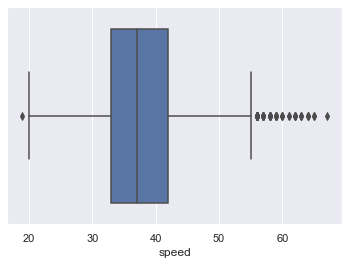

In [13]:
#Check for outliers in the data
sns.boxplot(amis['speed'])

In [14]:
## For record purposes
##One useful way of detecting outliers for possible removal is the IQR score technique

Q1 = amis['speed'].quantile(0.25)
Q3 = amis['speed'].quantile(0.75)
IQR = Q3 - Q1
IQR

9.0

In [21]:
##To check the number of rows that contain outliers and remove them
#amis = amis[~ ((amis['speed'] < (Q1 - 1.5 * IQR)) | (amis['speed'] > (Q3 + 1.5 * IQR))).any()]
#amis.shape


count    8437.000000
mean       37.824227
std         6.507540
min        19.000000
25%        33.000000
50%        37.000000
75%        42.000000
max        67.000000
Name: speed, dtype: float64


Text(0.5, 1.0, 'Disribution of car speed')

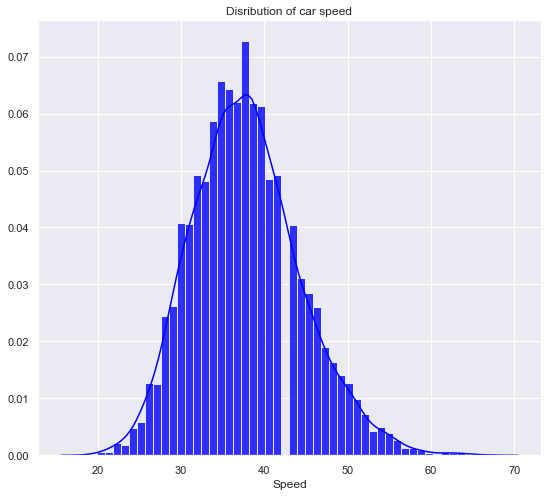

In [15]:
##Plot a Histogram
print(amis['speed'].describe())

plt.figure(figsize = (9, 8))
sns.distplot(amis['speed'], color = "blue", bins = 50, hist_kws = {"alpha" : 0.8})
plt.xlabel("Speed")
plt.title("Disribution of car speed")

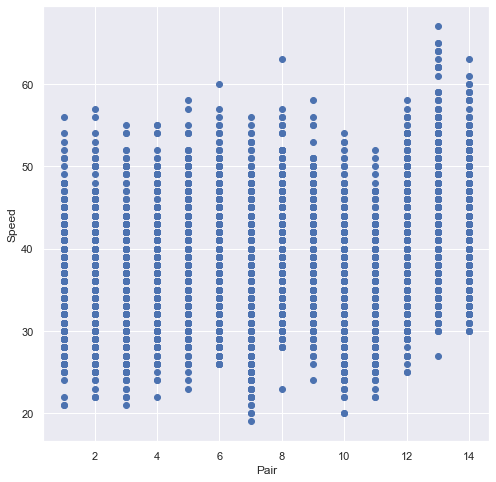

In [16]:
##Plot a scatter plot
fig, ax = plt.subplots(figsize = (8, 8))
ax.scatter(amis['pair'], amis['speed'])
ax.set_xlabel("Pair")
ax.set_ylabel("Speed")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

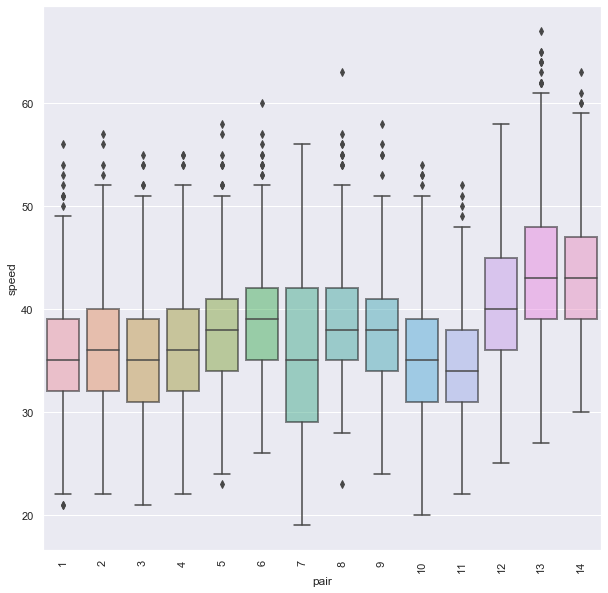

In [17]:
##Better still make boxplots of the last plot
plt.figure(figsize = (10, 10))
ax = sns.boxplot(x = "pair", y = "speed", data = amis)
plt.setp(ax.artists, alpha = 0.5, linewidth = 2, edgecolor = 'k')
plt.xticks(rotation = 90)

[None, None, None, None, None, None]

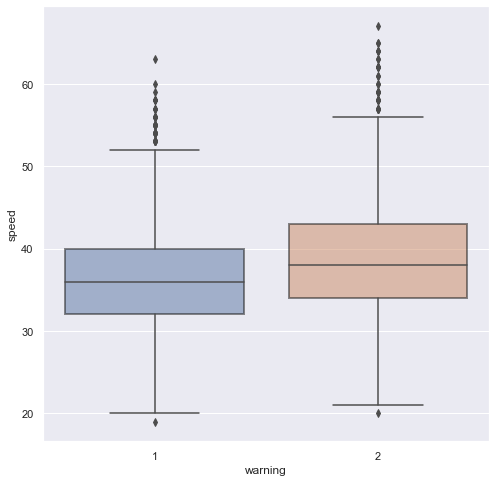

In [18]:
plt.figure(figsize = (8, 8))
ax = sns.boxplot(x = "warning", y = "speed", data = amis)
plt.setp(ax.artists, alpha = 0.5, linewidth = 2, edgecolor = 'k')
#plt.xticks(rotation = 45)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

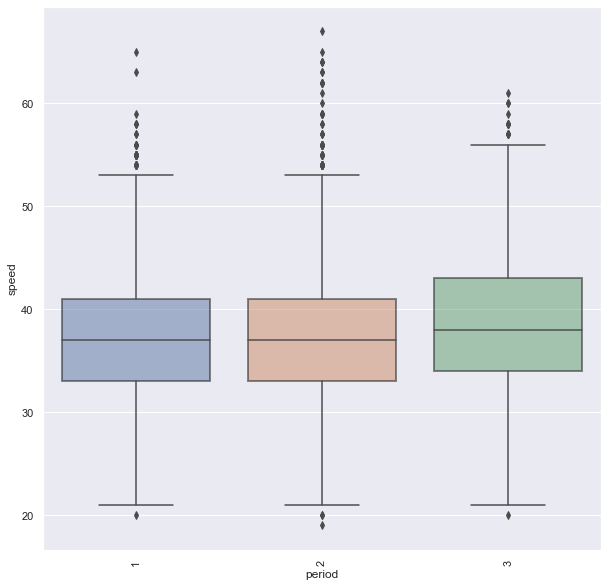

In [19]:
plt.figure(figsize = (10, 10))
ax = sns.boxplot(x = "period", y = "speed", data = amis)
plt.setp(ax.artists, alpha = 0.5, linewidth = 2, edgecolor = 'k')
plt.xticks(rotation = 90)

In [21]:
amis.groupby(['pair']).agg({'speed' : "mean"})

,speed
pair,
1,35.725000
2,36.313333
3,35.113903
4,36.410935
5,38.022298
6,38.943333
7,35.533333
8,38.955000
9,37.901667


In [41]:
amis.groupby(['warning']).agg({'speed': "mean"})

,speed
warning,
1,36.637914
2,38.979181


In [22]:
amis.groupby(['period']).agg({'speed' : 'mean'})

,speed
period,
1,37.364286
2,37.460714
3,38.636940


In [23]:
##Fit a linear model
import statsmodels.api as sm

model = sm.OLS.from_formula("speed ~ pair + warning + period", data = amis)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     155.7
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:01:02   Log-Likelihood:                -26680.
No. Observations:                8437   AIC:                         5.339e+04
Df Residuals:                    8420   BIC:                         5.351e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       34.0519      0.257    132.397      0.000      33.548      34.556
pair[T.2]        0.5883      0.330      1.781      0.075      -0.059       1.236
pair[T.3]       -0.6128      0.331     -1.853      0.064      -1.261       0.036
pair[T.4]        0.7291      0.335      2.175      0.030       0.072       1.386
pair[T.5]        2.2871      0.333      6.873      0.000       1.635       2.939
pair[T.6]        3.2183      0.330      9.742      0.000       2.571       3.866
pair[T.7]       -0.1917      0.330     -0.580      0.562      -0.839       0.456
pair[T.8]        3.2300      0.330      9.777      0.000       2.582       3.878
pair[T.9]        2.1767      0.330      6.589      0.000       1.529       2.824
pair[T.10]      -0.3004      0.332     -0.906      0.365      -0.951       0.350
pair[T.11]      -1.4636      0.319     -4.592      0.000      -2.088      -0.839
pair[T.12]       4.6050      0.330     13.940      0.000       3.957       5.253
pair[T.13]       8.0067      0.330     24.237      0.000       7.359       8.654
pair[T.14]       7.3083      0.330     22.123      0.000       6.661       7.956
warning[T.2]     2.3990      0.125     19.236      0.000       2.154       2.643
period[T.2]      0.0964      0.153      0.631      0.528      -0.203       0.396
period[T.3]      1.3245      0.153      8.676      0.000       1.025       1.624
==============================================================================
Omnibus:                      257.354   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              282.337
Skew:                           0.429   Prob(JB):                     4.91e-62
Kurtosis:                       3.260   Cond. No.                         18.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

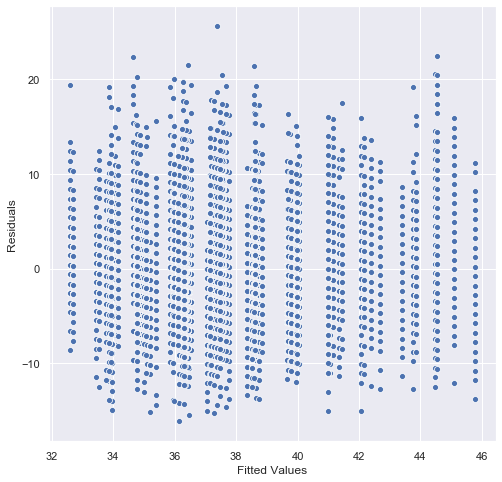

In [24]:
plt.figure(figsize = (8,8))
model_plot = sns.scatterplot(result.fittedvalues, result.resid)
model_plot.set_xlabel("Fitted Values")
_ = model_plot.set_ylabel("Residuals")

In [28]:
##Carry out a Hypothesis test of difference in means

with_warning = amis[amis["warning"] == 1]
without_warning = amis[amis["warning"] == 2]

In [29]:
n1 = len(with_warning)
mu1 = with_warning["speed"].mean()
sd1 = with_warning["speed"].std()

print(n1, mu1, sd1)

4162 36.6379144641999 6.195395199411602


In [31]:
n2 = len(without_warning)
mu2 = without_warning["speed"].mean()
sd2 = without_warning["speed"].std()

print(n2, mu2, sd2)

4275 38.97918128654971 6.596484279622776


In [34]:

sm.stats.ztest(with_warning["speed"], without_warning["speed"])

(-16.79484774566411, 2.661866521055598e-63)

### With an extremely small p-value of 2.6619e-63, we reject the null hypothesis that there has not been any significant change in speed with relation to location of warning signs ###